# 2.1.1.2. Poisson Regression
## DEFINITION
**Poisson regression is a type of generalized linear model that is used to model count data and contingency tables**. Count data are data that represent the number of occurrences of an event, such as the number of students who graduate, the number of traffic accidents, the number of people who finish a triathlon, etc. Contingency tables are data that show the frequency distribution of two or more categorical variables, such as the number of people who have a certain disease by age group and gender. Poisson regression assumes that the response variable follows a Poisson distribution, which is a discrete probability distribution that describes the probability of a given number of events occurring in a fixed interval of time or space. Poisson regression also assumes that the logarithm of the expected value (mean) of the response variable can be modeled by a linear combination of unknown parameters.

## USE CASES
Poisson regression can be used to examine the relationship between one or more predictor variables and the response variable, and to make predictions and test hypotheses. For example, Poisson regression can be used to predict the number of students who graduate based on their GPA and gender, or to test whether there is a difference in the number of traffic accidents between sunny and rainy days3. Poisson regression can also be modified to account for different exposure levels or population sizes in each observation, or to capture the interaction effects between predictor variables2.

## ADVANTAGES
- It can handle count data and contingency tables without transforming them.
- It can model non-linear relationships between the predictor variables and the response variable.
- It can handle both continuous and categorical predictor variables.
- It can be easily extended to other types of distributions.
  
## DISADVANTAGES
-  It requires the mean and variance of the response variable to be equal.
-  It may not fit well if there are too many zeros or outliers in the data.
-  It may suffer from overdispersion or underdispersion.
-  It may not capture complex relationships between predictor variables. Therefore, Poisson regression should be used with caution and checked for its assumptions and goodness of fit before interpreting and applying the results.

## HANDS-ON: POISSON REGRESSION

### 1. IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### 2. DATA IMPORT

In [2]:
df = pd.read_csv('../assets/resources-2.1.1.2/complaints.csv')

### 3. PREPROCESSING

In [3]:
df['intercept'] = 1

### 4. POISSON REGRESSION MODEL

In [4]:
model = sm.GLM(df['complaints'], df[['intercept', 'time']], family=sm.families.Poisson())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             complaints   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22.695
Date:                Sat, 06 May 2023   Deviance:                       1.4099
Time:                        23:21:36   Pearson chi2:                     1.38
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9506
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6537      0.227      7.300      0.0

### 5. EVALUATION

In [5]:
# Printing the model summary table
print(result.summary())

# Making predictions based on the model
new_data = pd.DataFrame({'time': [1, 2, 3, 4, 5]})
new_data['intercept'] = 1
predictions = result.predict(new_data)
print(predictions)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             complaints   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22.695
Date:                Sat, 06 May 2023   Deviance:                       1.4099
Time:                        23:22:10   Pearson chi2:                     1.38
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9506
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6537      0.227      7.300      0.0

### 6. VISUALIZATION

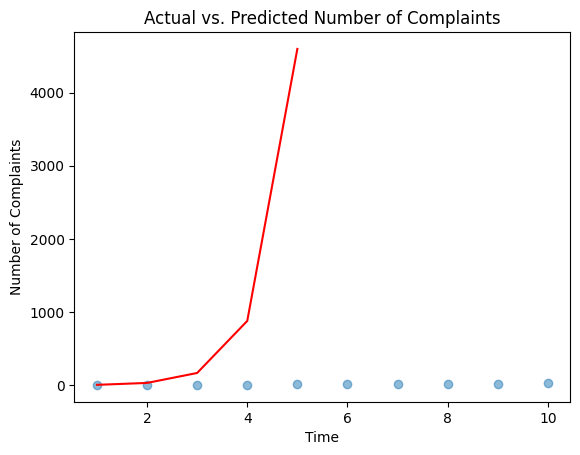

In [6]:
plt.scatter(df['time'], df['complaints'], alpha=0.5)
plt.plot(new_data['time'], predictions, color='red')
plt.xlabel('Time')
plt.ylabel('Number of Complaints')
plt.title('Actual vs. Predicted Number of Complaints')
plt.show()

## REFERENCES
1. https://en.wikipedia.org/wiki/Poisson_regression
2. https://www.statology.org/poisson-regression/
3. https://www.dataquest.io/blog/tutorial-poisson-regression-in-r/